In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import scipy.io as sio
import jax.numpy as jnp
import sys

In [2]:
# Data Parse
line_num = 0
x = []
y = []
u = []
v = []
theta = []
p = []
t = []

X_min = -4.0
X_max = 12.0
Y_min = -4.0
Y_max = 4.0

N_file = 100
DATA_PATH = "data/"

xyz_file = DATA_PATH + "uvtp_data_" + str(0) + ".csv"

with open(xyz_file, mode='r') as file:
    csvFile = csv.reader(file)
    next(csvFile, None)
    for lines in csvFile:
        x.append(float(lines[3]))
        y.append(float(lines[4]))

for i in range(0, N_file):
    file_name = DATA_PATH + "/uvtp_data_" + str(i) + ".csv"
    time = 0.2 * i
    t.append(time)
    with open(file_name, mode='r') as file:
        csvFile = csv.reader(file)
        next(csvFile, None)
        for lines in csvFile:
            u.append(float(lines[8]))
            v.append(float(lines[9]))
            theta.append(float(lines[7]))
            p.append(float(lines[2]))
    print(f"File: {i} is Done.")

File: 0 is Done.
File: 1 is Done.
File: 2 is Done.
File: 3 is Done.
File: 4 is Done.
File: 5 is Done.
File: 6 is Done.
File: 7 is Done.
File: 8 is Done.
File: 9 is Done.
File: 10 is Done.
File: 11 is Done.
File: 12 is Done.
File: 13 is Done.
File: 14 is Done.
File: 15 is Done.
File: 16 is Done.
File: 17 is Done.
File: 18 is Done.
File: 19 is Done.
File: 20 is Done.
File: 21 is Done.
File: 22 is Done.
File: 23 is Done.
File: 24 is Done.
File: 25 is Done.
File: 26 is Done.
File: 27 is Done.
File: 28 is Done.
File: 29 is Done.
File: 30 is Done.
File: 31 is Done.
File: 32 is Done.
File: 33 is Done.
File: 34 is Done.
File: 35 is Done.
File: 36 is Done.
File: 37 is Done.
File: 38 is Done.
File: 39 is Done.
File: 40 is Done.
File: 41 is Done.
File: 42 is Done.
File: 43 is Done.
File: 44 is Done.
File: 45 is Done.
File: 46 is Done.
File: 47 is Done.
File: 48 is Done.
File: 49 is Done.
File: 50 is Done.
File: 51 is Done.
File: 52 is Done.
File: 53 is Done.
File: 54 is Done.
File: 55 is Done.
Fi

In [67]:
# Data Frame
x = np.array(x)
y = np.array(y)
u = np.array(u)
u = u.reshape(N_file, x.shape[0])
v = np.array(v)
v = v.reshape(N_file, x.shape[0])
theta = np.array(theta)
theta = theta.reshape(N_file, x.shape[0])
p = np.array(p)
p = p.reshape(N_file, x.shape[0])
t = np.array(t)
id_mask = []
id_bc = []
for i in range(np.shape(x)[0]):
    if ((x[i] >= X_min) and (x[i] <= X_max)) and ((y[i] >= Y_min) and (y[i] <= Y_max)):
        id_mask.append(i)

x_sub = x[id_mask]
y_sub = y[id_mask]
print(x_sub.shape)

u_sub = u[:, id_mask]
v_sub = v[:, id_mask]
p_sub = p[:, id_mask]
theta_sub = theta[:, id_mask]

x_min = np.min(x_sub)
x_max = np.max(x_sub)
y_min = np.min(y_sub)
y_max = np.max(y_sub)

for i in range(np.shape(x)[0]):
    if (x[i] == x_min) and ((y[i] >= y_min) and (y[i] <= y_max)):
        id_bc.append(i)
    if (x[i] == x_max) and ((y[i] >= y_min) and (y[i] <= y_max)):
        id_bc.append(i)
    if ((x[i] >= x_min) and (x[i] <= x_max)) and (y[i] == y_min):
        id_bc.append(i)
    if ((x[i] >= x_min) and (x[i] <= x_max)) and (y[i] == y_max):
        id_bc.append(i)

# x_bc = x[id_bc]
# y_bc = y[id_bc]

# u_bc = u[:, id_bc]
# v_bc = v[:, id_bc]
# p_bc = p[:, id_bc]

# theta_bc = theta[:, id_bc]

# If temperature has to be reported Positive
# id_neg = np.where(theta_sub < 0)
# print("Prior", id_neg)
# theta_sub[id_neg] = 0.0
# id_neg_test = np.where(theta_sub < 0)
# print("Post", theta_sub)
# theta_ic = theta_sub[0, :]

# fig = plt.figure()
# ax = fig.add_subplot()
# c = ax.scatter(x_bc, y_bc, c=theta_bc[50, :], cmap='hsv')
# plt.show()

# Cyl Boundary
R = 0.5
# x_cyl = np.array([R * np.cos(angle) for angle in range(0, 360)])
# y_cyl = np.array([R * np.sin(angle) for angle in range(0, 360)])
# x_cyl = x_cyl.flatten()[:, None]
# y_cyl = y_cyl.flatten()[:, None]
# xy_cyl = np.hstack((x_cyl, y_cyl))
# N_cyl = xy_cyl.shape[0]
# t_cyl = np.array(t).flatten()[:, None]

# xy_cyl_tile = jnp.tile(xy_cyl, (N_file, 1))
# t_cyl_tile = jnp.tile(t_cyl.T, (N_cyl, 1))
# t_cyl_tile = t_cyl_tile.swapaxes(0, 1)
# t_cyl_tile = t_cyl_tile.reshape(N_cyl * N_file, 1)

# txy_cyl = jnp.hstack((t_cyl_tile, xy_cyl_tile))
# sh = txy_cyl.shape
# theta_cyl = 1.0 * jnp.ones(shape=(sh[0], 1))
# print(theta_cyl)

data = {"x": x_sub, "y": y_sub, "t": t,
        "u": u_sub, "v": v_sub, "theta": theta_sub,
        "p": p_sub}

sio.savemat("data.mat", data)
print(data.keys())

(29180,)
dict_keys(['x', 'y', 't', 'u', 'v', 'theta', 'p'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


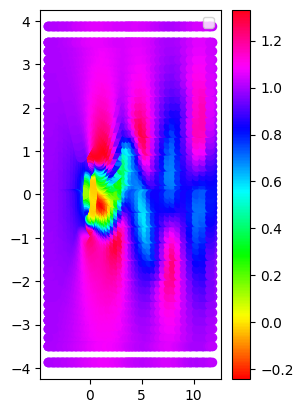

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


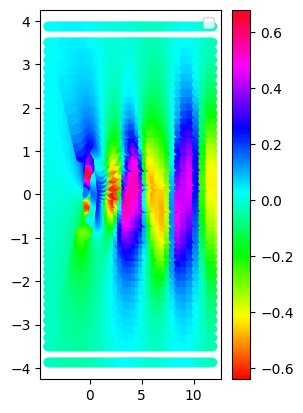

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


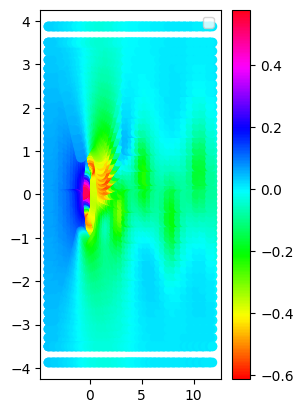

In [23]:
# Data Visulization
fig = plt.figure()
ax = fig.add_subplot(121)
c = ax.scatter(data["x"], data["y"], c=data["u"][1, :], cmap='hsv')
plt.colorbar(c)
# c = ax.scatter(x_cyl, y_cyl)
plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(121)
c = ax.scatter(data["x"], data["y"], c=data["v"][1, :], cmap='hsv')
plt.colorbar(c)
# c = ax.scatter(x_cyl, y_cyl)
plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(121)
c = ax.scatter(data["x"], data["y"], c=data["p"][1, :], cmap='hsv')
plt.colorbar(c)
# c = ax.scatter(x_cyl, y_cyl)
plt.legend()

plt.show()

In [19]:
# Structure of the data frame
loaded_data = sio.loadmat("data.mat")
for key, value in loaded_data.items():
    # Skip any of the default entries added by scipy.io
    if key not in ["__header__", "__version__", "__globals__"]:
        print(f"Shape of {key}: {np.array(value).shape}")

Shape of x: (1, 29180)
Shape of y: (1, 29180)
Shape of t: (100, 1)
Shape of u: (100, 29180)
Shape of v: (100, 29180)
Shape of theta: (100, 29180)
Shape of p: (100, 29180)


128

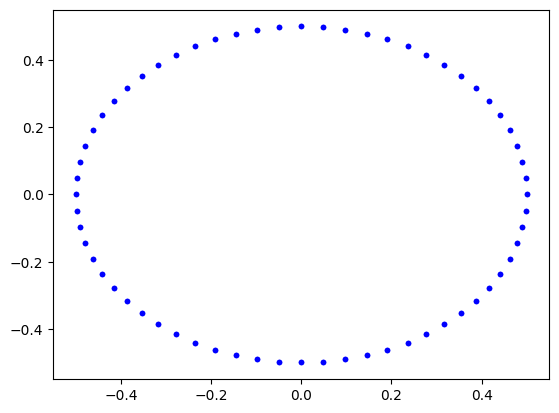

In [24]:
cutoff = 4351
def dist(x: float, y: float, threshold: float = 0.001) -> bool:
    return (np.abs(x * x + y * y - R * R) <= threshold)
id_cyl = []
for i in range(cutoff):
    if dist(data['x'][i], data['y'][i]):
        id_cyl.append(i)
plt.plot(data['x'][id_cyl], data['y'][id_cyl], '.b')
len(id_cyl)

In [75]:
# Data Sample
N_b = 20
N_f = 40
N_p = 1

t = data['t'].flatten()[:, None]
X, T = np.meshgrid(data['x'].flatten()[:, None], t)
Y, T = np.meshgrid(data['y'].flatten()[:, None], t)
coord = np.hstack((T.flatten()[:,None], X.flatten()[:,None], Y.flatten()[:,None])) # (t, x, y)

momentum = np.hstack((data['u'].flatten()[:, None], data['v'].flatten()[:, None])) # (u, v)

lb, rb = x.min(0), x.max(0)
ub, db = y.min(0), y.max(0)

# Initial Condition
coord_ic = coord[:29180]
momentum_ic = momentum[:29180]

# Boundary Condition
x_bc, y_bc = x[id_bc].flatten()[:, None], y[id_bc].flatten()[:, None]
Xb, Tb = np.meshgrid(x_bc, t)
Yb, Tb = np.meshgrid(y_bc, t)
coord_bc = np.hstack((Tb.flatten()[:,None], Xb.flatten()[:,None], Yb.flatten()[:,None])) # (t, xb, yb)
momentum_bc = np.hstack((u[:, id_bc].flatten()[:, None], v[:, id_bc].flatten()[:, None]))

# Cylinder Condition
x_cyl, y_cyl = x[id_cyl].flatten()[:, None], y[cyl].flatten()[:, None]
Xc, Tc = np.meshgrid(x_cyl, t)
Yc, Tc = np.meshgrid(y_cyl, t)
coord_cyl = np.hstack((Tc.flatten()[:,None], Xc.flatten()[:,None], Yc.flatten()[:,None])) # (t, xc, yc)
momentum_cyl = np.hstack((u[:, id_cyl].flatten()[:, None], v[:, id_cyl].flatten()[:, None]))

In [80]:
coord_b_train = np.vstack([coord_ic, coord_bc, coord_cyl])
momentum_b_train = np.vstack([momentum_ic, momentum_bc, momentum_cyl])

idx = np.random.choice(coord_b_train.shape[0], N_b, replace=False)

coord_b_train = coord_b_train[idx, :]
momentum_b_train = momentum_b_train[idx, :]

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io as sio

In [4]:
# Seed setting for reproducibility
np.random.seed(1234)
tf.random.set_seed(1234)

In [5]:
class PINN(keras.Model):
    def __init__(self, layer_sizes):
        super(PINN, self).__init__()
        self.dense_layers = [layers.Dense(size, activation='tanh',
                                          kernel_initializer='glorot_normal') for size in layer_sizes]
        self.output_layer = layers.Dense(3, activation=None)  # Outputs p, u, v

    def call(self, inputs):
        x = inputs
        for layer in self.dense_layers:
            x = layer(x)
        return self.output_layer(x)

    def physics_informed_loss(self, inputs, train, boundary_conditions, cyl_conditions, initial_conditions):
        t, x, y = inputs[:, 0:1], inputs[:, 1:2], inputs[:, 2:3]
        predictions = self(inputs, training=True)
        p, u, v = predictions[:, 0:1], predictions[:, 1:2], predictions[:, 2:3]

        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch([x, y])
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch([t, x, y])
                u_t = tape1.gradient(u, t)
                v_t = tape1.gradient(v, t)
                u_x = tape1.gradient(u, x)
                v_x = tape1.gradient(v, x)
                p_x = tape1.gradient(p, x)
                u_y = tape1.gradient(u, y)
                v_y = tape1.gradient(v, y)
                p_y = tape1.gradient(p, y)
            u_xx = tape2.gradient(u_x, x)
            u_yy = tape2.gradient(u_y, y)
            v_xx = tape2.gradient(v_x, x)
            v_yy = tape2.gradient(v_y, y)

        continuity_eq = u_x + v_y
        momentum_u = u_t + (u * u_x + v * u_y) + p_x - (u_xx + u_yy)/Re
        momentum_v = v_t + (u * v_x + v * v_y) + p_y - (v_xx + v_yy)/Re

        data_loss = tf.reduce_mean(tf.square(train - predictions))
        boundary_loss = tf.reduce_mean(tf.square(boundary_conditions - predictions))
        cyl_loss = tf.reduce_mean(tf.square(cyl_conditions - predictions))
        initial_loss = tf.reduce_mean(tf.square(initial_conditions - predictions))
        physics_loss = tf.reduce_mean(tf.square(continuity_eq)) + \
                       tf.reduce_mean(tf.square(momentum_u)) + \
                       tf.reduce_mean(tf.square(momentum_v))

        total_loss = data_loss + boundary_loss + cyl_loss + initial_loss + physics_loss
        return total_loss

In [25]:
# Model and training parameters
Re = tf.Variable(100.0, trainable=True)  # Reynolds number as a trainable variable
layer_sizes = [24]*7  # 7 hidden layers, each with 24 neurons
model = PINN(layer_sizes)
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

In [51]:
# Data Processing
inputs_tf = np.hstack((data['t'], data['x'], data['y']))
train_tf = np.hstack((data['p'], data['u'], data['v']))
boundary_conditions_tf = np.hstack((data['t'], data['x_bc'], data['y_bc']))
cyl_condtions_tf = np.hstack(data['txy_cyl'])
time_zeros = np.zeros_like(data['x_ic'])
initial_conditions_tf = np.hstack((time_zeros, data['x_ic'], data['y_ic']))

In [50]:
# Train the model using Nadam for the first 400 iterations
Nadam_it = 400
for epoch in range(Nadam_it):
    with tf.GradientTape() as tape:
        loss = model.physics_informed_loss(tf.convert_to_tensor(inputs_tf, dtype=tf.float32), 
                                           tf.convert_to_tensor(train_tf, dtype=tf.float32),
                                           tf.convert_to_tensor(boundary_conditions_tf, dtype=tf.float32),
                                           tf.convert_to_tensor(initial_conditions_tf, dtype=tf.float32))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

2024-04-19 17:58:00.487619: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: Index out of range using input dim 1; input has only 1 dims
2024-04-19 17:58:00.487648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Index out of range using input dim 1; input has only 1 dims


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

In [ ]:
# Switch to L-BFGS optimizer for the remaining 600 iterations
LBFGS_it = 600
def function_factory(model, inputs, u_train, boundary_conditions, initial_conditions):
    """ A factory to create a function required by L-BFGS optimizer. """
    def loss_fn():
        return model.physics_informed_loss(inputs, u_train, boundary_conditions, initial_conditions), \
               tf.dynamic_stitch(tfp.optimizer.lbfgs_minimize.indices, model.trainable_variables)
    return loss_fn

loss_fn = function_factory(model, inputs_tf, u_train_tf, boundary_conditions_tf, initial_conditions_tf)
results = tfp.optimizer.lbfgs_minimize(
    value_and_gradients_function=loss_fn,
    initial_position=tf.dynamic_stitch(tfp.optimizer.lbfgs_minimize.indices, model.trainable_variables),
    num_correction_pairs=10,
    num_iterations=LBFGS_it,
    tolerance=1e-8
)

print(f"Optimization results: {results}")
